### Placements

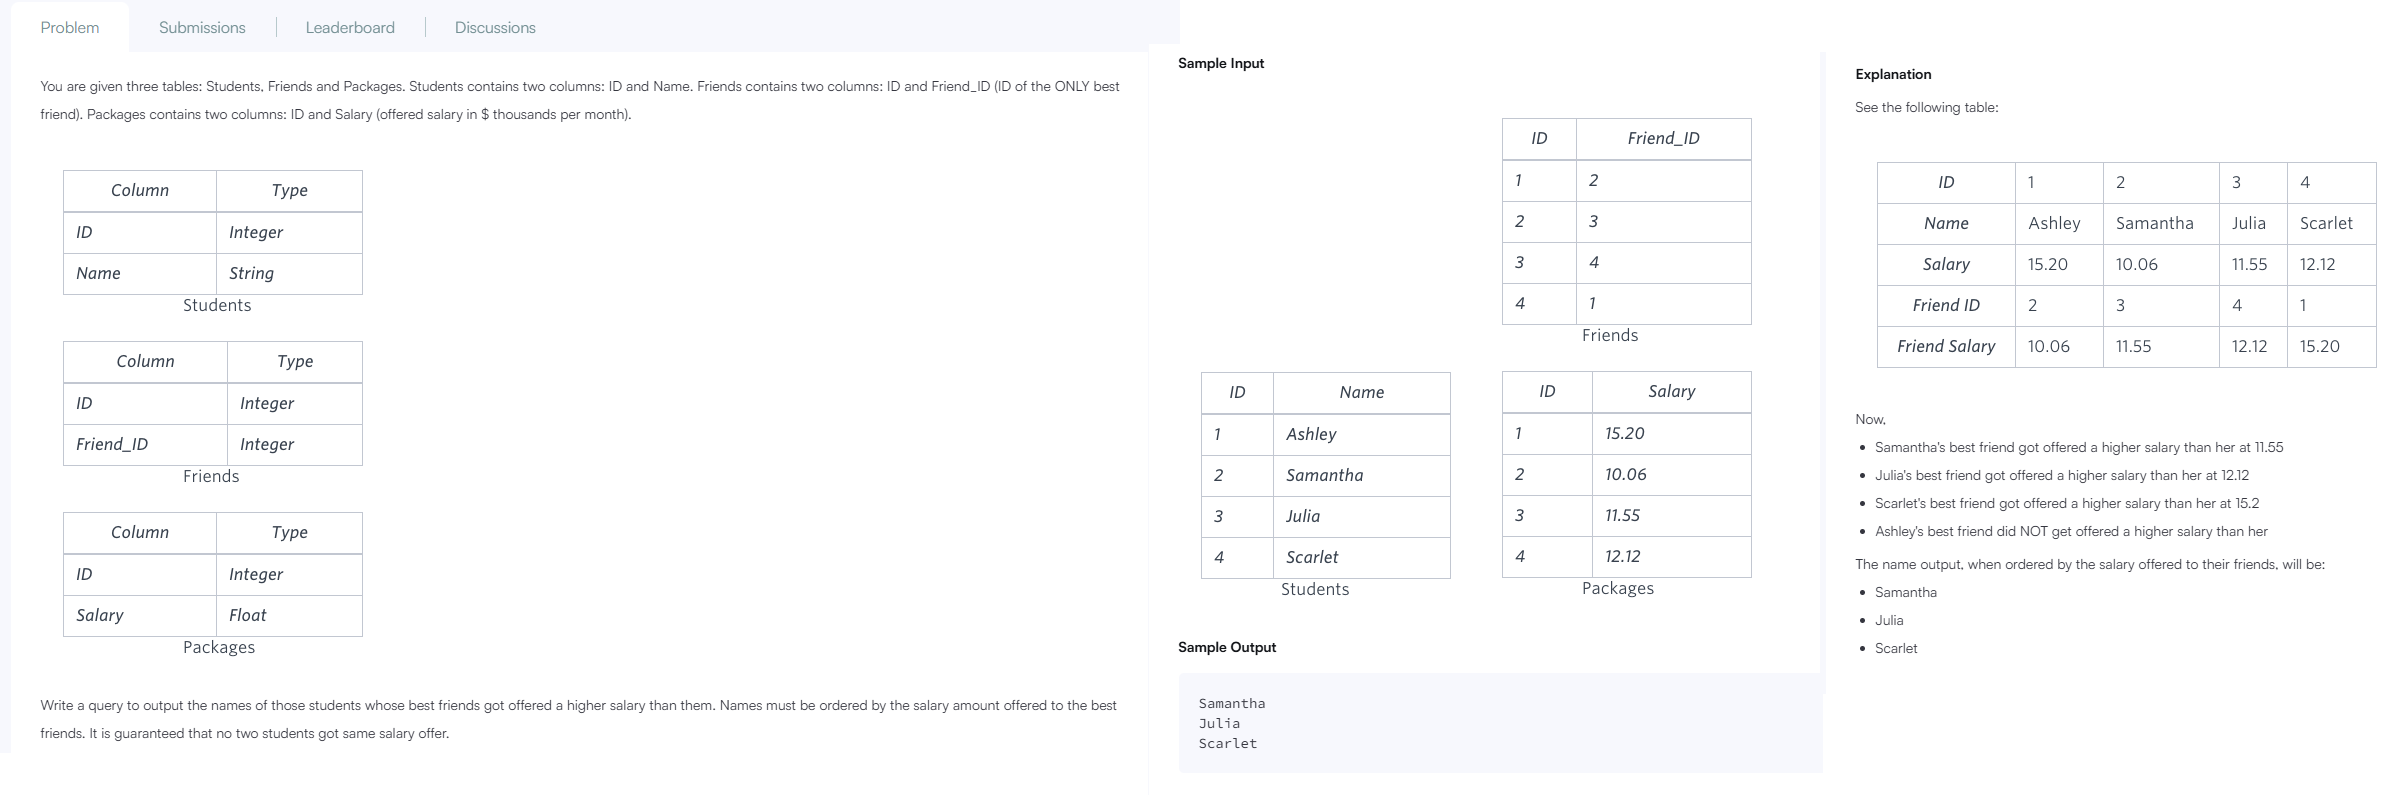

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

In [0]:
spark = SparkSession.builder.appName('Placements').getOrCreate()

In [0]:
dbutils.fs.ls('FileStore/HackerRank')

Out[4]: [FileInfo(path='dbfs:/FileStore/HackerRank/Challenges.csv', name='Challenges.csv', size=12481, modificationTime=1730586225000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Colleges.csv', name='Colleges.csv', size=6350, modificationTime=1730585150000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Contests.csv', name='Contests.csv', size=4913, modificationTime=1730585150000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Friends.csv', name='Friends.csv', size=134, modificationTime=1730923823000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Hackers.csv', name='Hackers.csv', size=6856, modificationTime=1730763742000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Packages.csv', name='Packages.csv', size=197, modificationTime=1730923823000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Projects.csv', name='Projects.csv', size=642, modificationTime=1730875513000),
 FileInfo(path='dbfs:/FileStore/HackerRank/Students.csv', name='Students.csv', size=218, modificationTime=1730923823000),
 FileInfo(p

In [0]:
## Define schema
students_schema = StructType([StructField('ID', IntegerType(), False),
                              StructField('Name', StringType(), False )])

friends_schema = StructType([StructField('ID', IntegerType(), False),
                             StructField('Friend_ID', IntegerType(), False)])

packages_schema = StructType([StructField('ID', IntegerType(), False),
                              StructField('Salary', DoubleType(), False)])                             

In [0]:
## Import data
students_df = spark.read.csv('dbfs:/FileStore/HackerRank/Students.csv', schema=students_schema, header=True)
friends_df = spark.read.csv('dbfs:/FileStore/HackerRank/Friends.csv', schema=friends_schema, header=True)
packages_df = spark.read.csv('dbfs:/FileStore/HackerRank/Packages.csv', schema=packages_schema, header=True)
display(packages_df)

ID,Salary
1,15.5
2,15.6
3,16.700001
4,18.799999
5,31.5
6,45.0
7,47.0
8,46.0
9,39.0
10,11.1


In [0]:
## Create SQL views
students_df.createOrReplaceTempView('students')
friends_df.createOrReplaceTempView('friends')
packages_df.createOrReplaceTempView('packages')

## Expected Output
Stuart \
Priyanka \
Paige \
Jane \
Julia \
Belvet \
Amina \
Kristeen \
Scarlet \
Priya \
Meera

### SQL Solution

In [0]:
%sql
SELECT st.name from students st
join packages pa on st.id=pa.id
join friends fr on st.id = fr.id
join packages fpa on fr.friend_id=fpa.id
where fpa.salary> pa.salary ORDER BY fpa.salary 

name
Stuart
Priyanka
Paige
Jane
Julia
Belvet
Amina
Kristeen
Scarlet
Priya


### Pyspark Solution

In [0]:
# Convert the above query into pyspark
result_df = students_df.alias('st').join(packages_df.alias('pa'), F.col('st.id')==F.col('pa.id'), how='inner')\
    .join(friends_df.alias('fr'), F.col('st.id') == F.col('fr.id'))\
        .join(packages_df.alias('fpa'), F.col('fr.friend_id') == F.col('fpa.id'))\
            .where(F.col('fpa.salary') > F.col('pa.salary'))\
                    .orderBy(F.col('fpa.salary'))\
                        .select(F.col('st.name'))

display(result_df)

name
Stuart
Priyanka
Paige
Jane
Julia
Belvet
Amina
Kristeen
Scarlet
Priya
